# Telecom Churn Case Study - Prajwal Brijesh Ainapur

## Business Problem Overview

   In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

   For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

   In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

In [1]:
#Importing required modules and doing basic configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Adjusting display options for bigger dataset
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)


## Data Understanding

In [2]:
#Importing dataset into dataframe
data = pd.read_csv('/home/prajwal_brijesh_ainapur/Downloads/telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [4]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Filtering high value customers

In [5]:
#Creating a new column to calculate the total data amount recharged
data["total_rech_data_amt_6"] = data["total_rech_data_6"]  * data['av_rech_amt_data_6']
data["total_rech_data_amt_7"] = data["total_rech_data_7"]  * data['av_rech_amt_data_7']
data["total_rech_data_amt_8"] = data["total_rech_data_8"]  * data['av_rech_amt_data_8']
data["total_rech_data_amt_9"] = data["total_rech_data_9"]  * data['av_rech_amt_data_9']

In [6]:
#Dropping columns which were used previously to create a new column
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

data.drop(drop_col, axis=1, inplace=True)

In [7]:
#Calculating average recharge amount 
av_rech_amt_6n7 = (data["total_rech_amt_6"].fillna(0) + data["total_rech_data_amt_6"].fillna(0) + 
data["total_rech_amt_7"].fillna(0) + data["total_rech_data_amt_7"].fillna(0))/2.0

#Estimating the 70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

#Deriving new dataframe for the datapoints where the average recharge amount is in the top 70 percentile
data_high = data[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', data_high.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


## Data Cleaning and EDA

In [8]:
#List of columns with only 1 unqiue value
col_list = data_high.loc[:,data_high.apply(pd.Series.nunique) == 1]
print(col_list.columns)

#Remove Columns with only 1 unique value
data_high = data_high.loc[:,data_high.apply(pd.Series.nunique) != 1]
data_high.shape

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


(30001, 206)

In [9]:
#Rename Columns with Meaning full Names
data_high.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [10]:
#Determining columns with date, categories and numeric values
id_cols = ['mobile_number', 'circle_id']

date_data = data_high.select_dtypes(include = 'object')
date_cols = list(date_data.columns)
# cate_data.head()

cate_cols =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

num_cols = [column for column in data_high.columns if column not in id_cols + date_cols + cate_cols]


In [11]:
#Converting the columns with date into datetime object
print(date_data.iloc[0])

for col in date_cols:
    data_high[col] = pd.to_datetime(data_high[col])

data_high.shape

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


(30001, 206)

In [12]:
#Calculating the percent of missing values from each column
columns = data_high.columns
percent_missing = data_high.isnull().sum() * 100 / len(data_high)
print(percent_missing)

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
onnet_mou_9                  6.336455
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
offnet_mou_9                 6.336455
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_ic_mou_9                6.336455
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
roam_og_mou_9                6.336455
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2t_mou_9             6.336455
loc_og_t2m_mou_6             1.816606
loc_og_t2m_m

In [13]:
#Drop Columns with > 30% of missing values and not for 9th Month
missing_value_df = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [14]:
#The shape of the new dataframe after removing columns with high missing values
data_high.drop(drop_col, axis=1, inplace=True)
data_high.shape

(30001, 179)

In [15]:
#Drop Rows with all Null Values
data_high = data_high.dropna(how='all',axis=0) 
data_high.shape

(30001, 179)

In [16]:
#Find Columns with Unique Value but Insignificant Frequency
for col_name in data_high.columns:
    if (len(data_high[col_name].unique()) <= 8):
        print(data_high[col_name].value_counts())
        print("-----------------------")

0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64
-----------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64
-----------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
-----------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64
-----------------------
0    26445
1     3175
2      346
3       30
4        5
Name: monthly_2g_9, dtype: int64
-----------------------
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64
-----------------------


In [17]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = data_high.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6         0.601308
total_ic_mou_7    loc_ic_t2t_mou_7    0.601684
arpu_2g_9         count_rech_3g_9     0.602386
total_og_mou_8    onnet_mou_9         0.603450
total_rech_amt_8  arpu_6              0.603673
                                        ...   
isd_og_mou_8      isd_og_mou_7        0.949809
                  isd_og_mou_6        0.950194
total_rech_amt_9  arpu_9              0.950539
total_rech_amt_8  arpu_8              0.955351
sachet_2g_9       count_rech_2g_9     0.980131
Length: 337, dtype: float64

In [18]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
data_high.drop(drop_col_list, axis=1, inplace=True)
data_high.shape


(30001, 124)

In [19]:
#churned customers (churn=1, else 0) 
data_high['churn'] = np.where(data_high[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)

In [20]:
#Remove All 9th Month related columns
drop_cols = [col for col in data_high.columns if '_9' in col]
print(drop_cols)

data_high.drop(drop_cols, axis=1, inplace=True)

data_high.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

In [21]:
#Writing functions for displaying distribution graphs
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.show()

In [22]:
# Writing a function to display Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [23]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


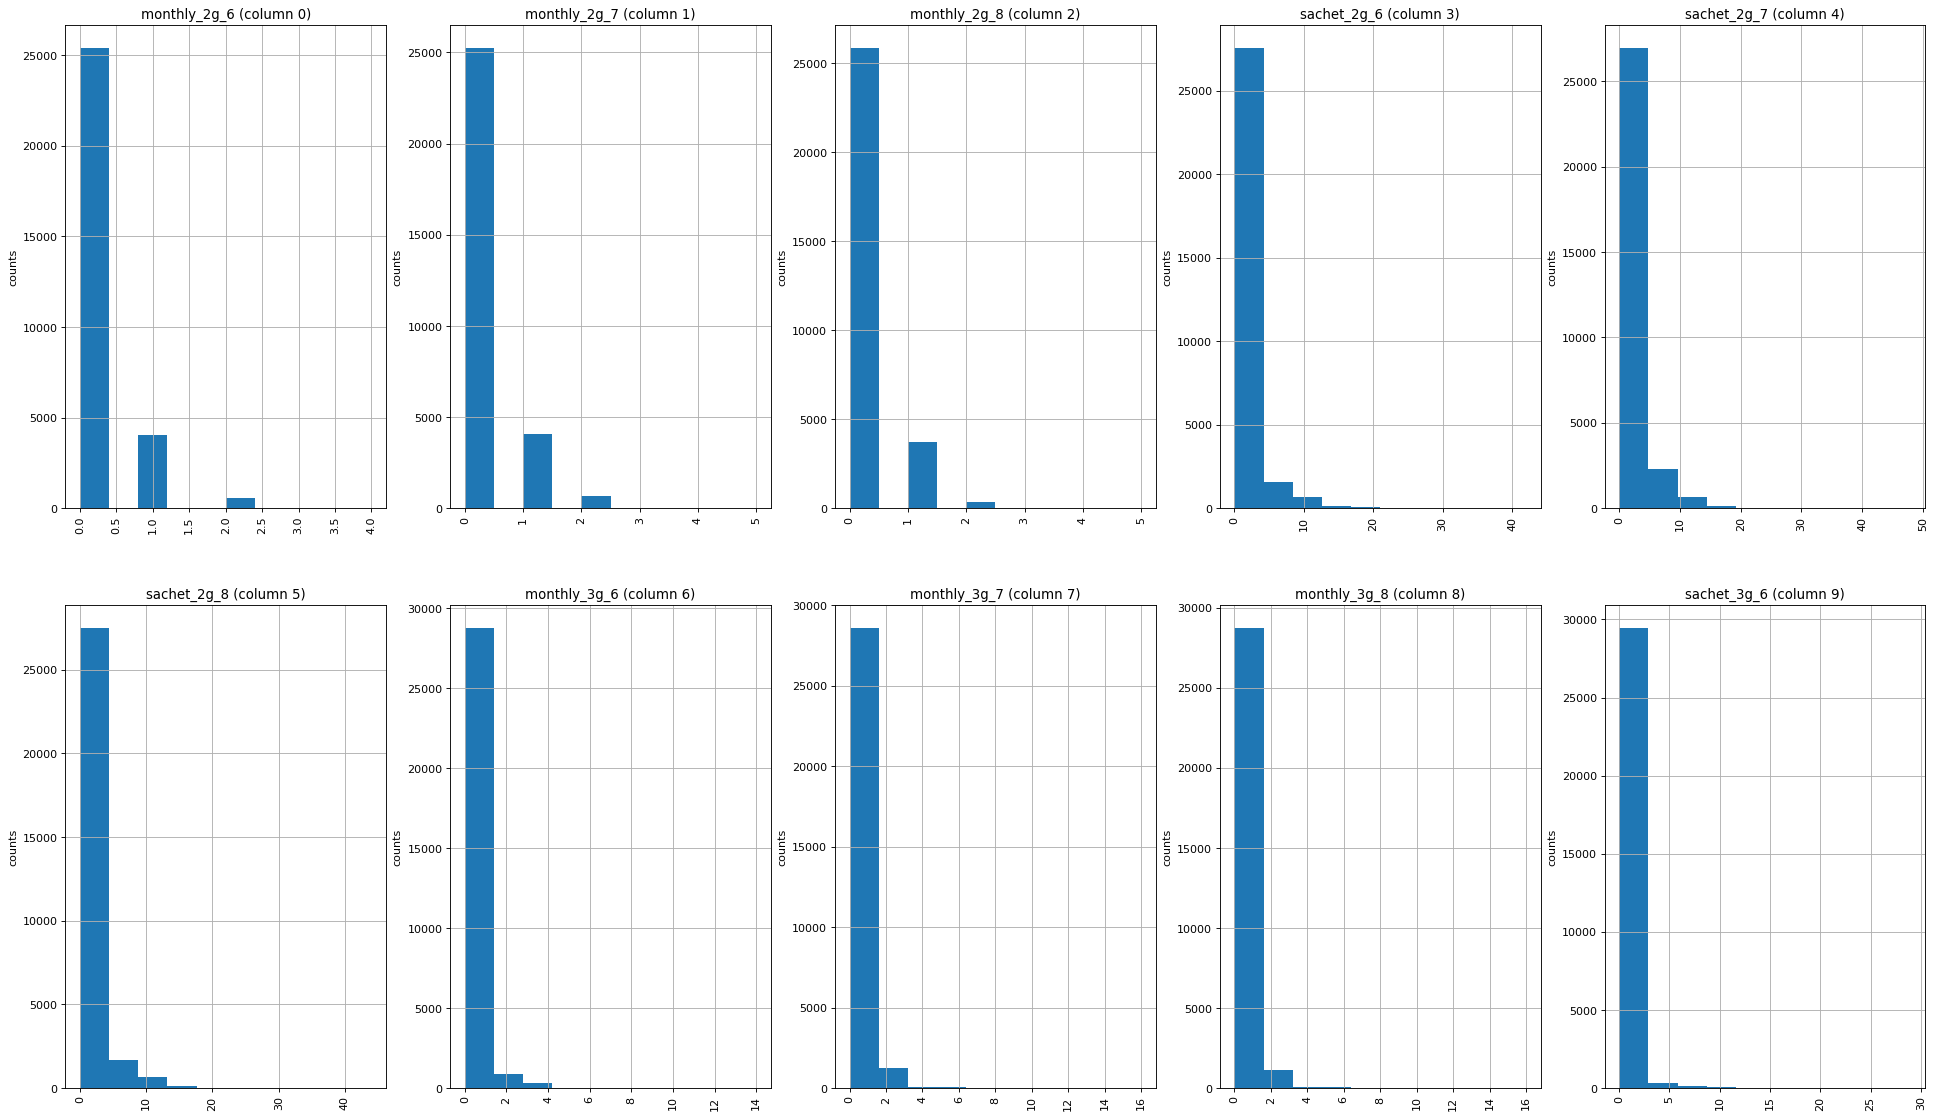

In [24]:
#Distribution graph
plotPerColumnDistribution(data_high, 10, 5)


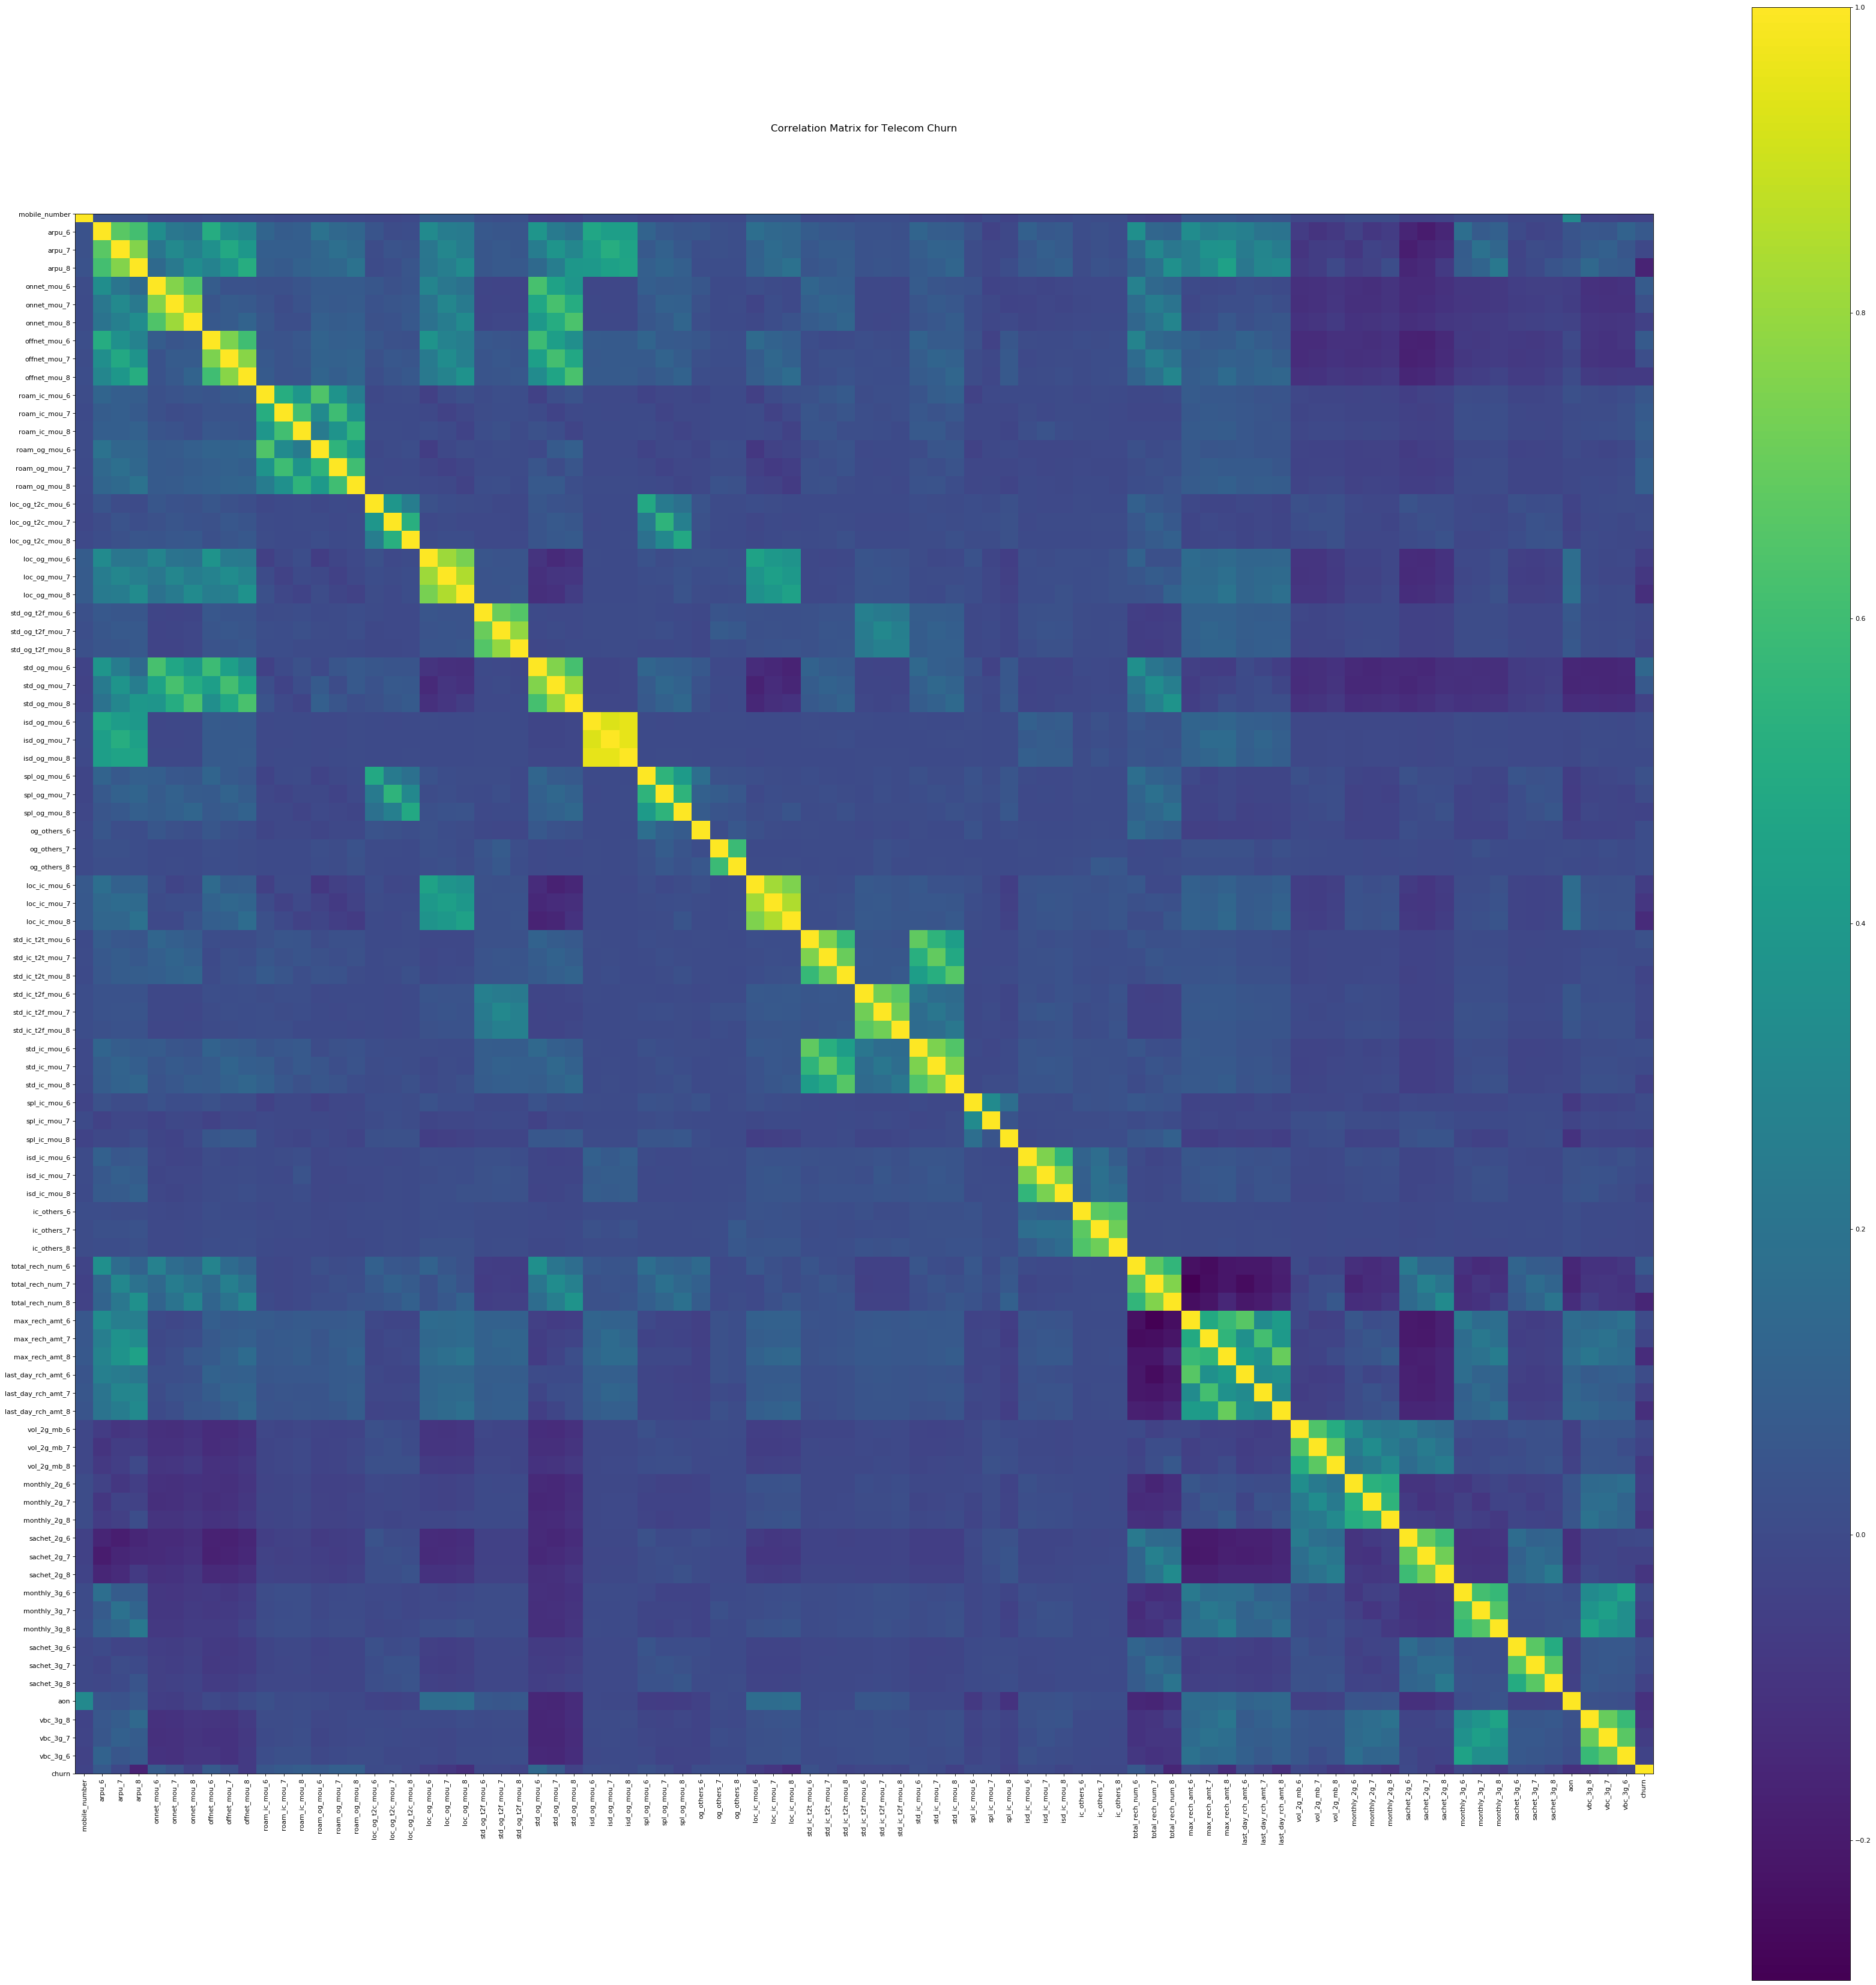

In [25]:
#Correlation matrix
plotCorrelationMatrix(data_high, 53)


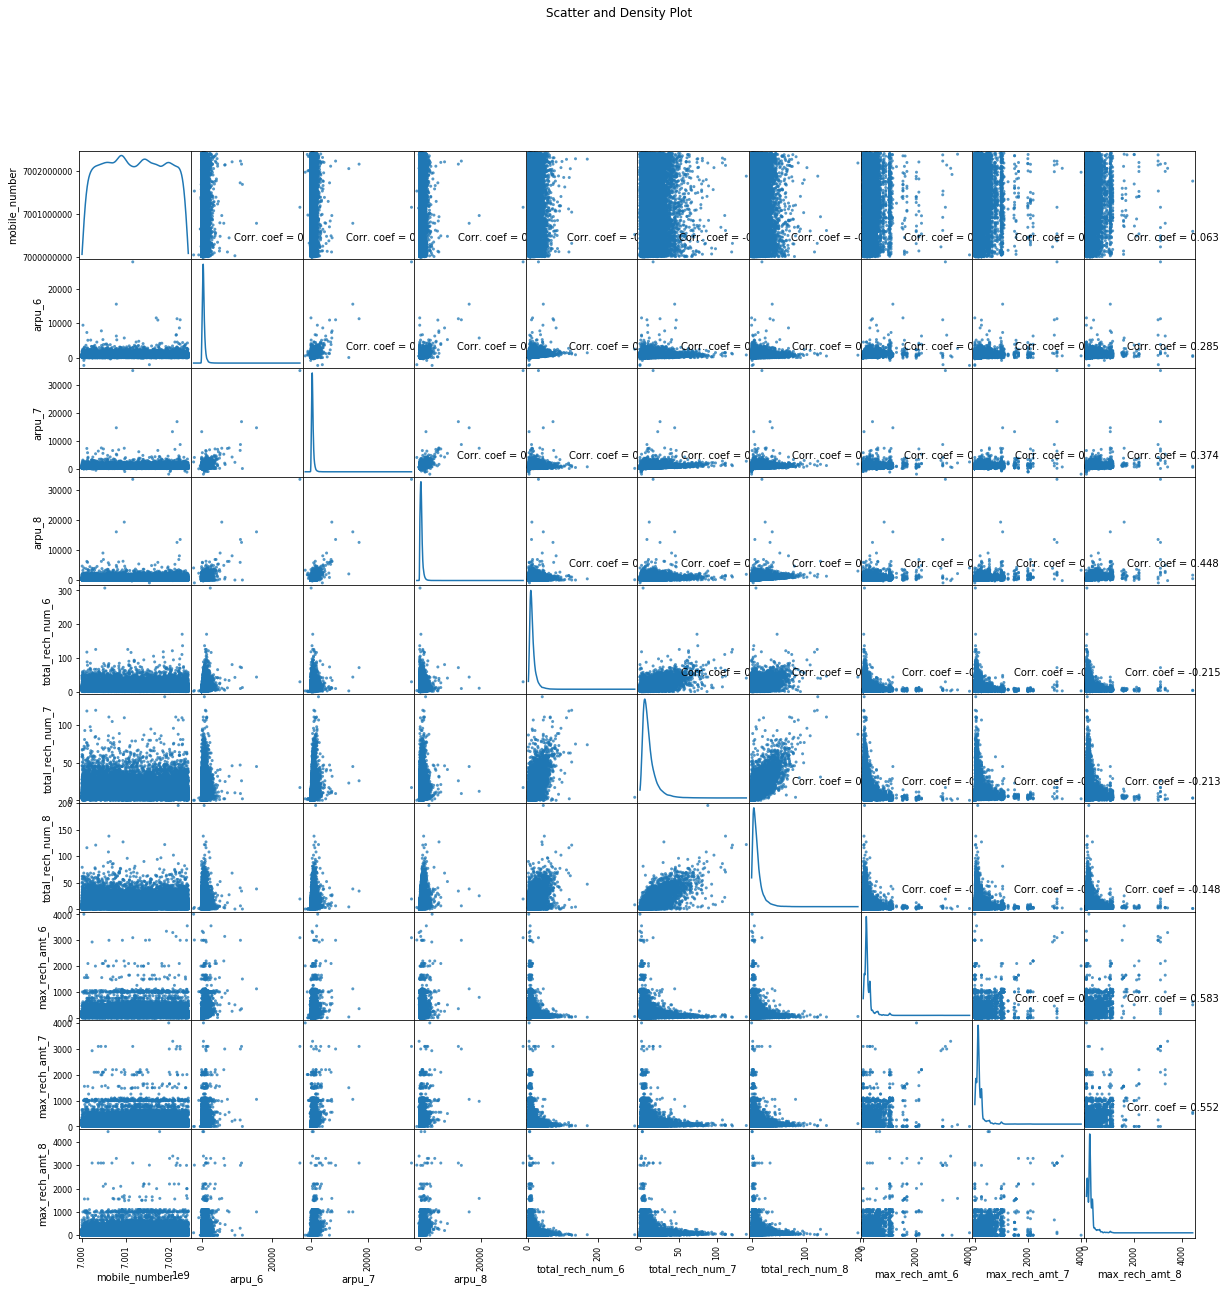

In [26]:
#Scatter Matrix
plotScatterMatrix(data_high, 20, 10)


The dataframe can be further processed by combining 6th and 7th month  together as this indicate the good phase

In [27]:
col_list = data_high.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (data_high.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_high[avg_col_name] = (data_high[col_6]  + data_high[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [28]:
#Removing columns with data from 6th and 7th month
print (data_high.shape)

col_list = data_high.filter(regex='_6|_7').columns

data_high.drop(col_list, axis=1, inplace=True)
data_high.shape


(30001, 115)


(30001, 59)

In [29]:
#Conevrt AON into Months
data_high['aon_mon'] = data_high['aon']/30
data_high.drop('aon', axis=1, inplace=True)
data_high['aon_mon'].head()



0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

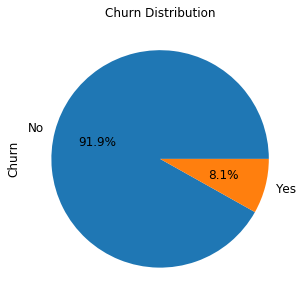

In [30]:
#Churn Distribution
ax = (data_high['churn'].value_counts()*100.0 /len(data_high)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)



In our data, 91.9% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. The dataset needs to be modified in order to get good ratio of churning data.

Distribution graphs (histogram/bar graph) of sampled columns:


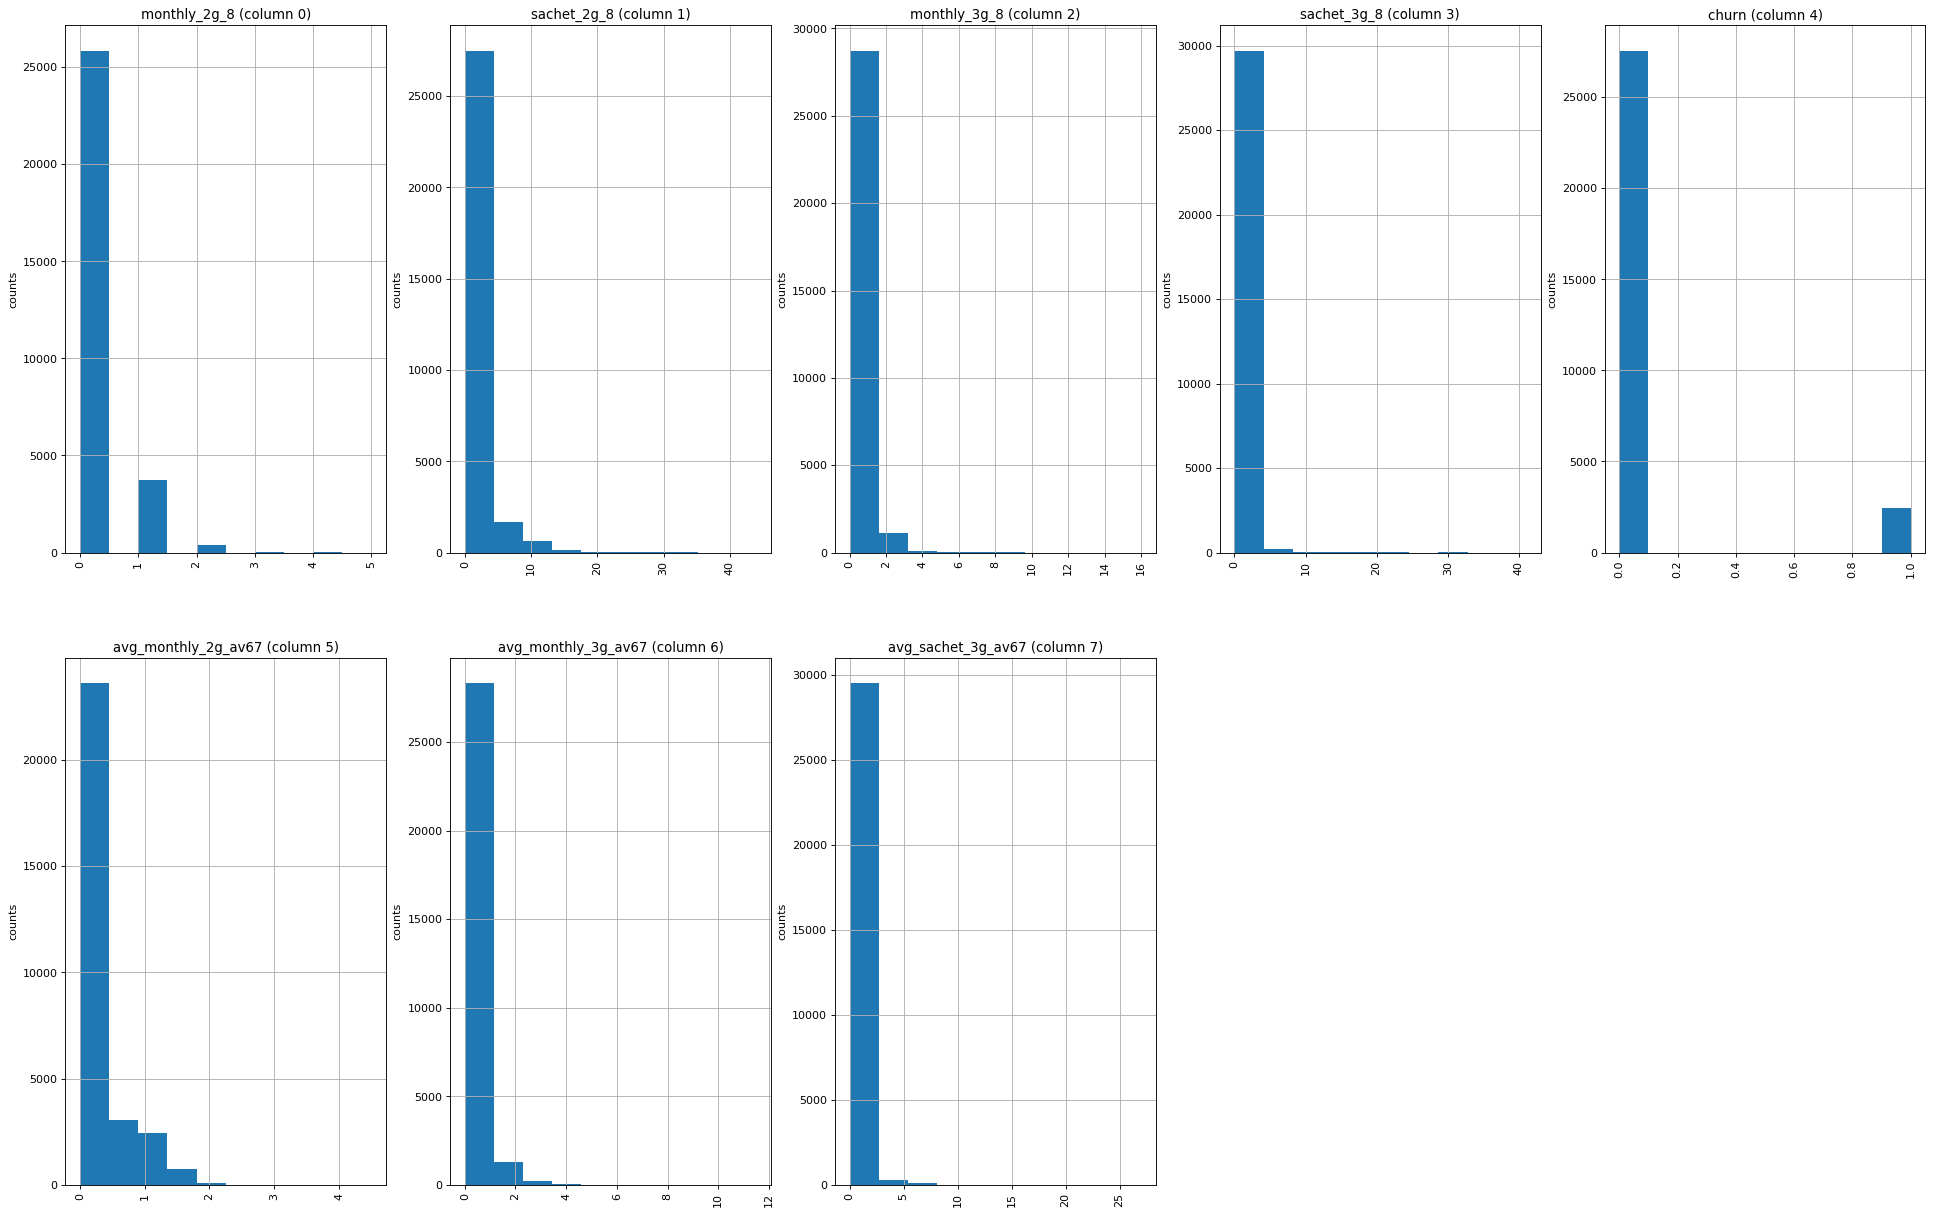

In [31]:
plotPerColumnDistribution(data_high, 10, 5)

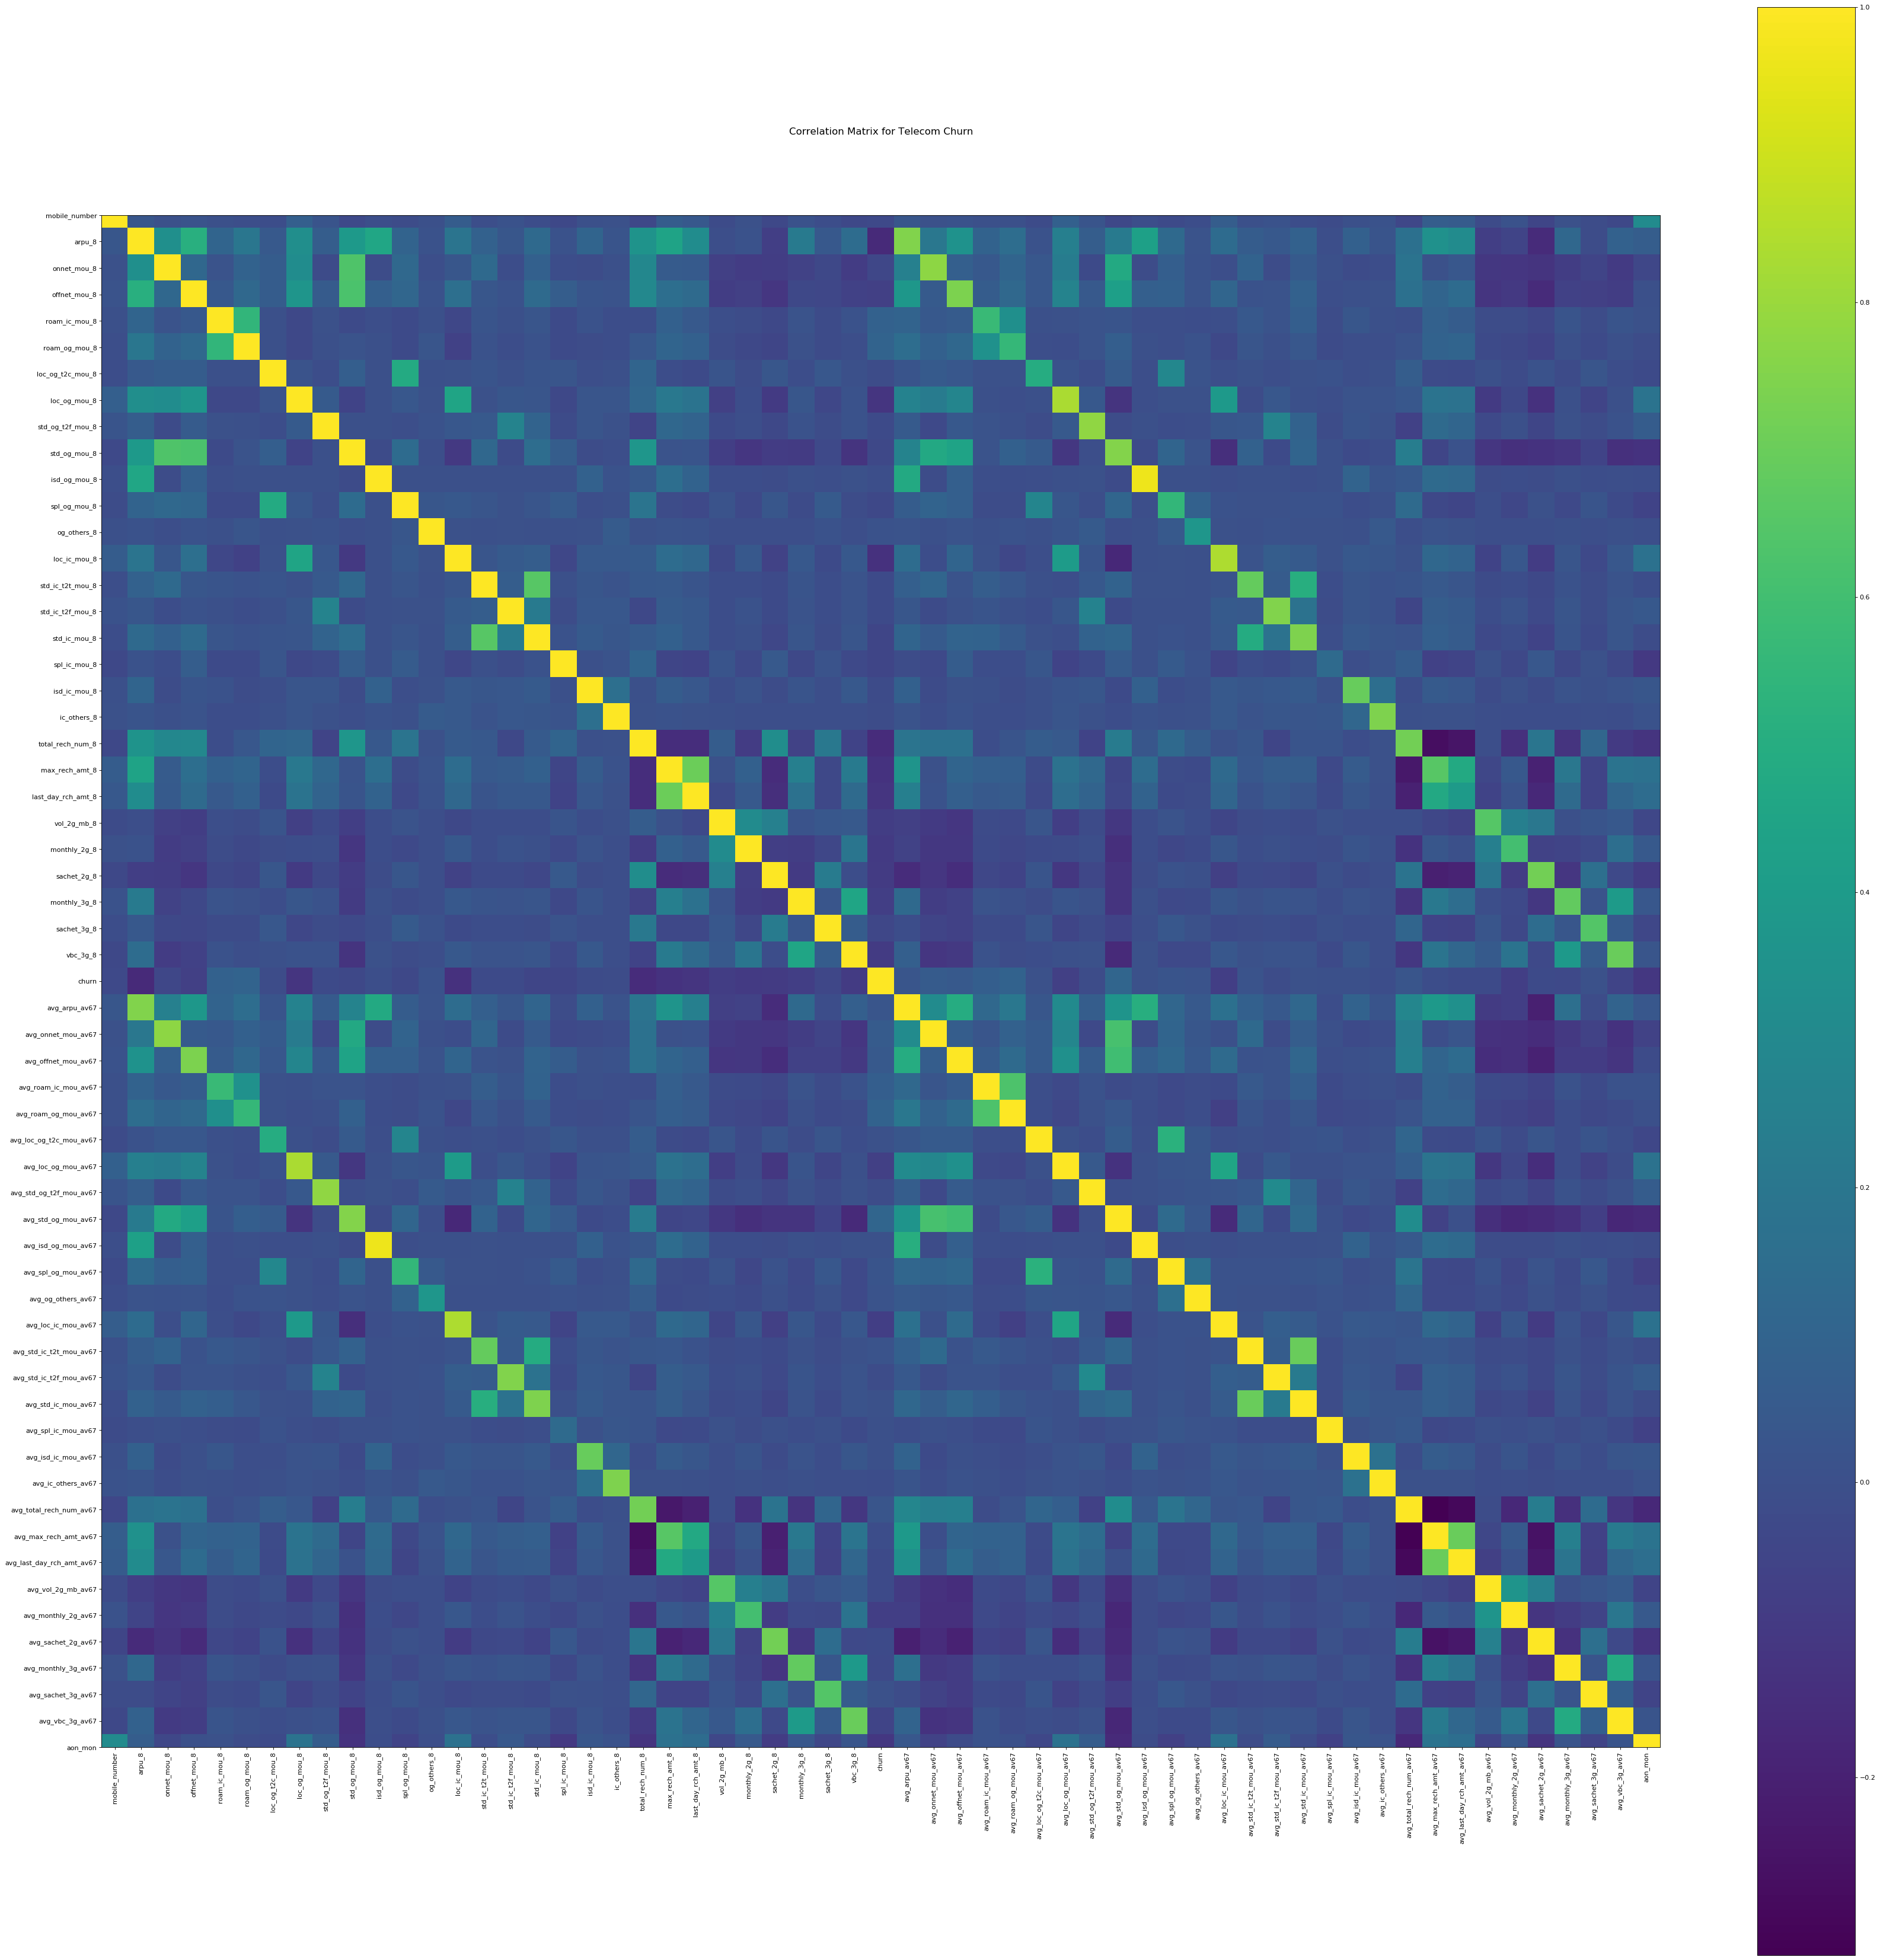

In [32]:
plotCorrelationMatrix(data_high, 53)


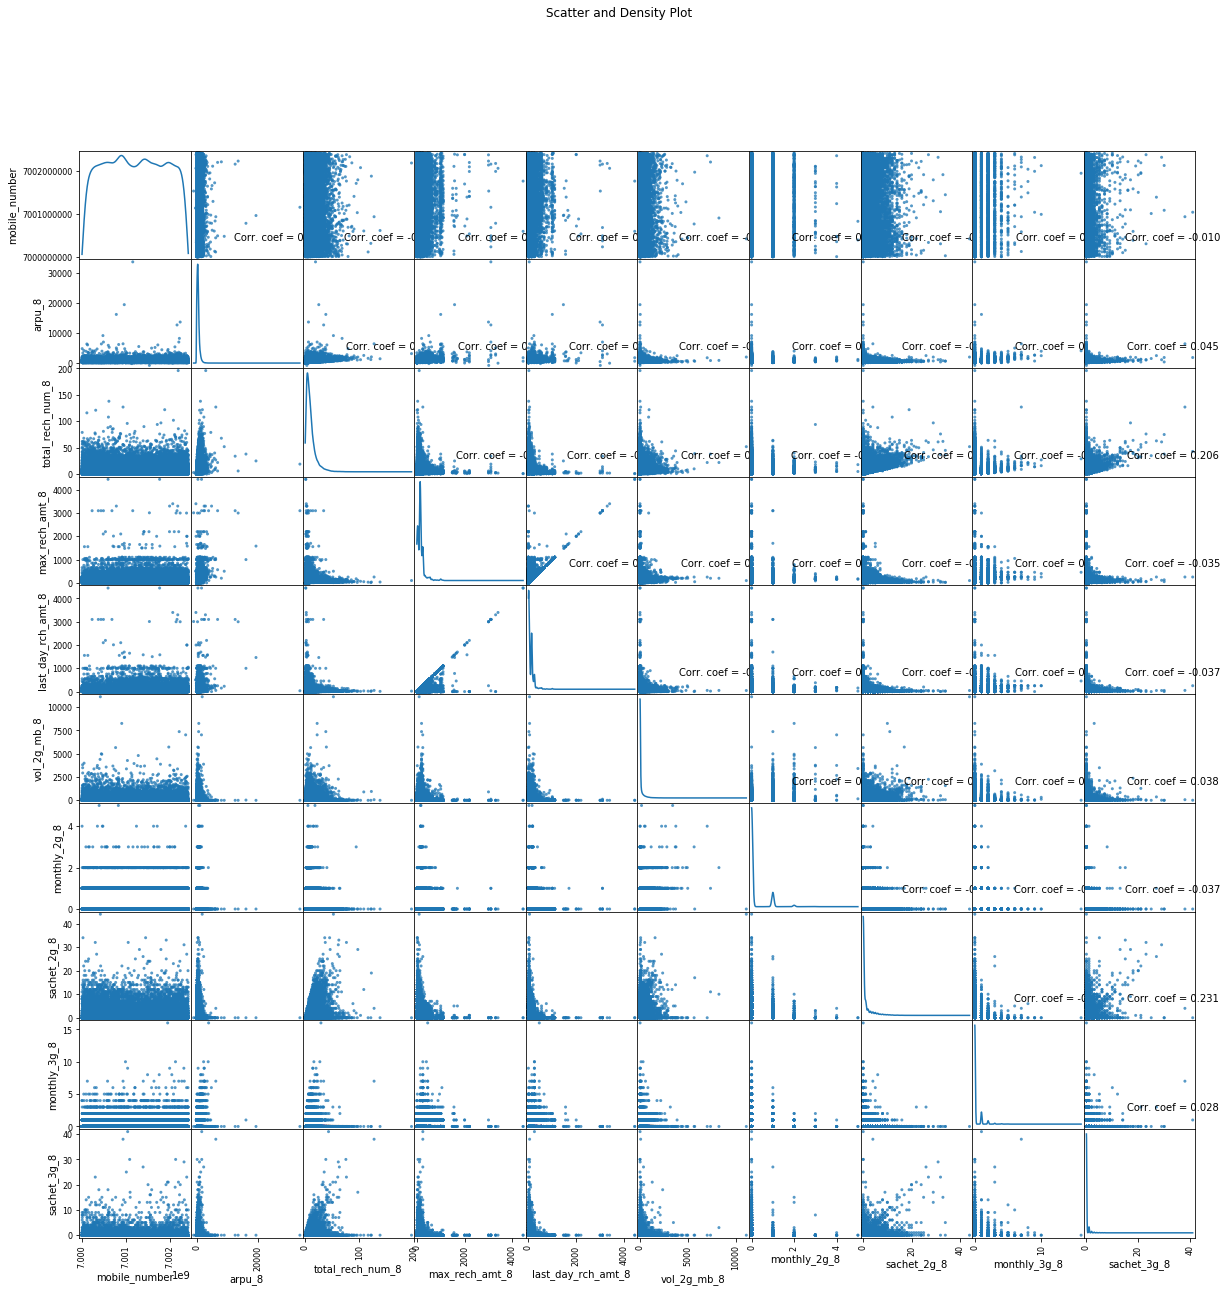

In [33]:
plotScatterMatrix(data_high, 20, 10)


Text(0.5, 1.0, 'Customers v/s tenure')

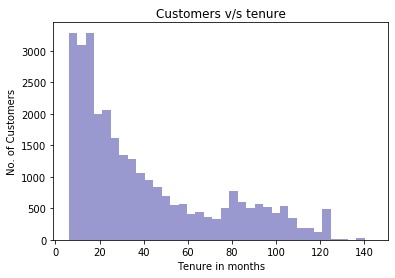

In [34]:
#Plotting data between number of customers v/s their tenure with the network
ax = sns.distplot(data_high['aon_mon'], hist=True, bins=int(180/5), color = 'darkblue', kde = False)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Customers v/s tenure')

In [35]:
#Creating custom tenure range column
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_high['tenure_range'] = pd.cut(data_high['aon_mon'], tn_range, labels=tn_label)
data_high['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

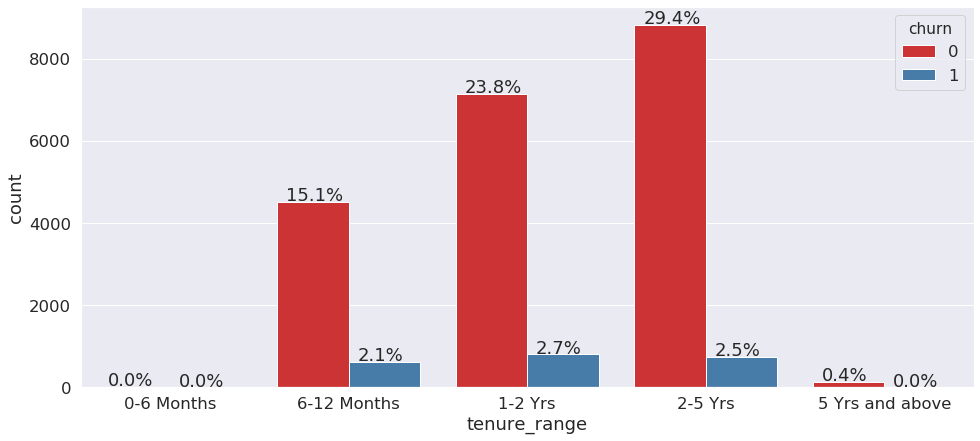

In [36]:
#Calculating churn distribution for the previously generated custom generated tenure ranges
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(data_high['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(data_high.index))
ax = sns.countplot(x="tenure_range", data=data_high, palette="Set1", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data_high))), (p.get_x()+0.05, p.get_height()+20))
plt.show()



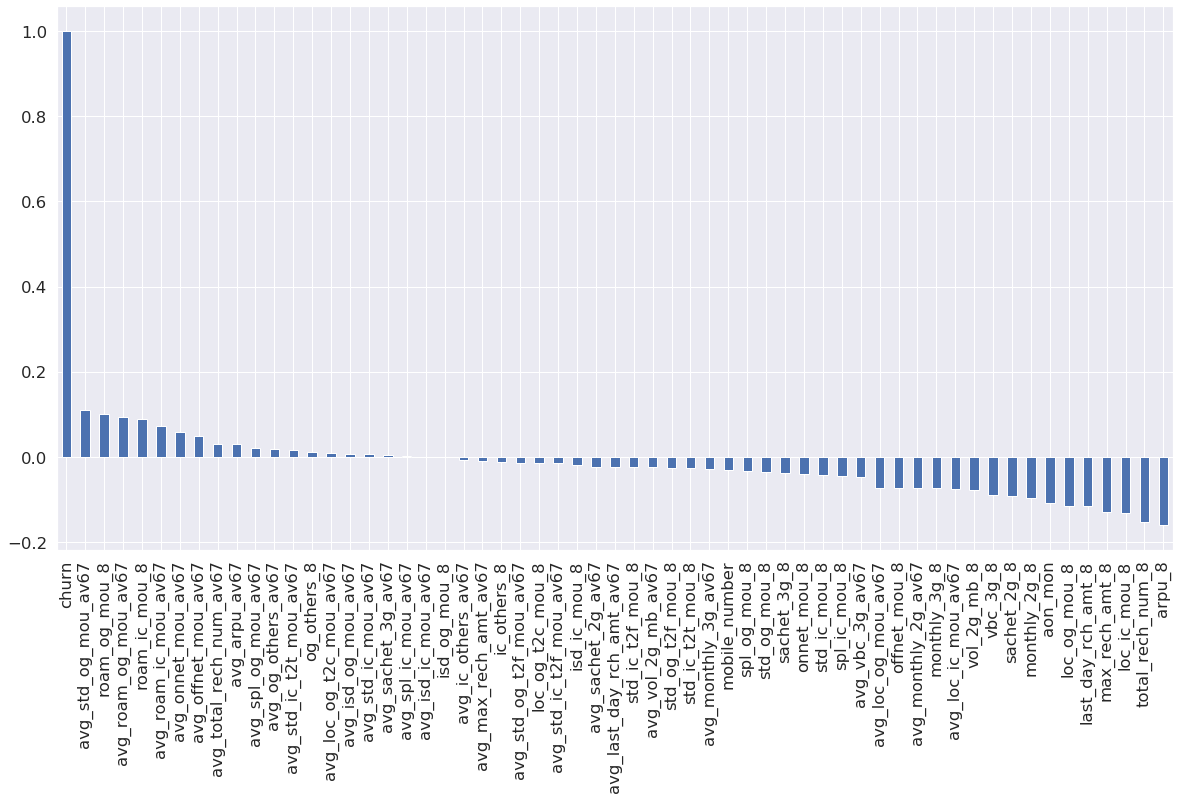

In [37]:
#Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
data_high.corr()['churn'].sort_values(ascending = False).plot(kind='bar')



Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.

Another correlation that needs to be looked into is the total recharge in 8th Month Vs Average Revenue in 8th Month


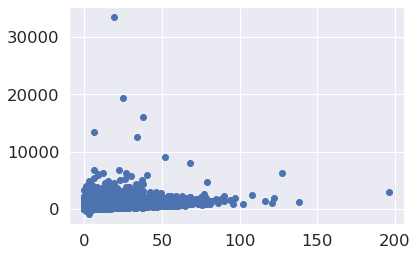

In [38]:
#Scatterplot between 'total_rech_num_8' and 'arpu_8'
plt.scatter(x = data_high['total_rech_num_8'], y = data_high['arpu_8'])
plt.show()


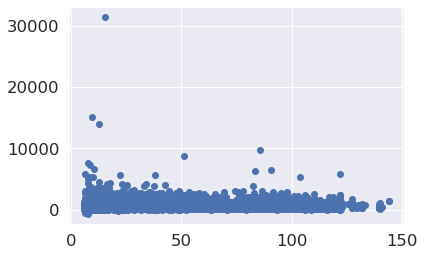

In [39]:
#Scatterplot between 'aon_mon' and 'avg_arpu_av67'
plt.scatter(x = data_high['aon_mon'], y = data_high['avg_arpu_av67'])
plt.show()


Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

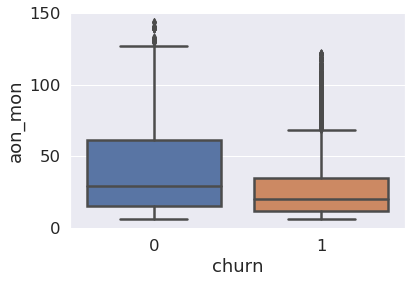

In [40]:
#Churn vs Tenure
sns.boxplot(x = data_high.churn, y = data_high.aon_mon)
plt.show()



As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.
Churn Vs Volume based cost

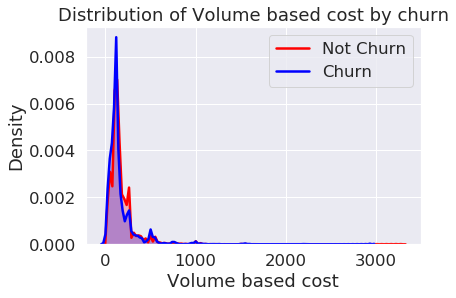

In [41]:
#KDEPlot for distribution of volume based on churn
ax = sns.kdeplot(data_high.avg_max_rech_amt_av67[(data_high["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high.avg_max_rech_amt_av67[(data_high["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')
plt.show()

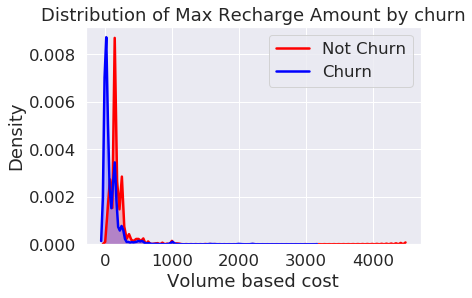

In [42]:
#KDEPlot for distribution of Max Recharge based on churn
ax = sns.kdeplot(data_high.max_rech_amt_8[(data_high["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high.max_rech_amt_8[(data_high["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()



    People Who Recharge with less Amount are more likely to Churn
    There is no visible difference in Volume Based Cost & Churn



In [43]:
#Lets Create New DF for Model Building
df = data_high[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0
df.fillna(0, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.1005,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333


In [44]:
#Creating X and y variables from the dataframe
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [45]:
#Scaling the data using standard scaler as different columns have different scales
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [46]:
#Splitting the dataset using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

#Calculating the imbalance in train and test dataset
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [47]:
# Balancing DataSet using SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [53]:
#Data imbalance after SMOTE
print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr Shape (38576, 57)
y_tr Shape (38576,)
Imbalance in Train Data :  1.0


## Logistic Regression to predict telecom churn

In [60]:
#Running Logistic Regression on balanced dataset
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=99)

lr = LogisticRegression()

# lr.svm = SVC(kernel='linear') 
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8462934162778641

In [50]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [61]:
#List of features selected by rfe
rfe_features = list(df.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'avg_total_rech_num_av67']


In [62]:
#Creating new variables after RFE
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [63]:
#Refitting logistic regression model on dataset after RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3017  746]
 [ 534 3419]]


In [65]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.8341109383100052


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      3763
           1       0.82      0.86      0.84      3953

    accuracy                           0.83      7716
   macro avg       0.84      0.83      0.83      7716
weighted avg       0.83      0.83      0.83      7716



In [67]:
weights = pd.Series(lr.coef_[0], index=rfe_features)
weights.sort_values(ascending = False)

avg_loc_ic_mou_av67        0.620992
avg_arpu_av67              0.481286
avg_total_rech_num_av67    0.302612
std_ic_t2f_mou_8          -0.298896
vol_2g_mb_8               -0.370145
std_ic_mou_8              -0.430902
spl_ic_mou_8              -0.441015
monthly_3g_8              -0.448720
last_day_rch_amt_8        -0.464778
sachet_2g_8               -0.607131
monthly_2g_8              -0.692160
total_rech_num_8          -0.860919
loc_og_mou_8              -0.957199
loc_ic_mou_8              -2.633050
og_others_8               -2.664645
dtype: float64



LR Summary

    Model Accuracy is 83%
    Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.



## PCA with Logistic Regression

In [68]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
#PCA Transformation for train and test data
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 57)
(7716, 57)


In [70]:
#Refitting Logistic Regression on PCA Data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[3100  663]
 [ 509 3444]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3763
           1       0.84      0.87      0.85      3953

    accuracy                           0.85      7716
   macro avg       0.85      0.85      0.85      7716
weighted avg       0.85      0.85      0.85      7716



In [72]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))


Logistic Regression accuracy with PCA:  0.8481078278900985


In [73]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)


,PC1,PC2,PC3,Feature
0,0.269956,-0.083984,-0.166746,arpu_8
1,0.162006,-0.191174,0.007593,onnet_mou_8
2,0.222032,-0.163292,-0.061069,offnet_mou_8
3,0.327953,0.341169,0.237263,roam_ic_mou_8
4,0.267532,0.202173,0.192352,roam_og_mou_8
5,0.036400,-0.056637,-0.001187,loc_og_t2c_mou_8
6,0.124955,-0.088955,-0.198010,loc_og_mou_8
7,0.040216,0.009841,-0.075933,std_og_t2f_mou_8
8,0.174547,-0.252144,0.045578,std_og_mou_8
9,0.028555,-0.002614,-0.041081,isd_og_mou_8


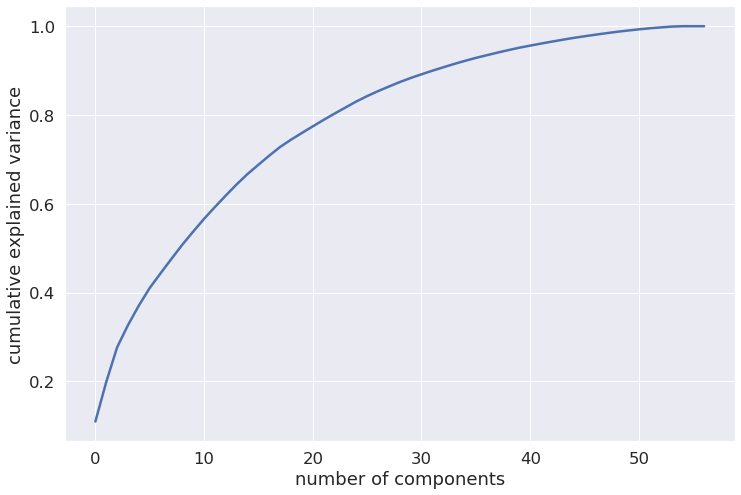

In [74]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [75]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.93,  19.85,  27.66,  32.66,  37.08,  41.03,  44.35,  47.59,
        50.78,  53.73,  56.6 ,  59.27,  61.86,  64.37,  66.7 ,  68.78,
        70.84,  72.79,  74.43,  75.94,  77.42,  78.89,  80.3 ,  81.67,
        83.03,  84.25,  85.37,  86.4 ,  87.41,  88.33,  89.16,  89.97,
        90.73,  91.49,  92.19,  92.86,  93.46,  94.06,  94.62,  95.16,
        95.63,  96.09,  96.53,  96.96,  97.37,  97.74,  98.09,  98.43,
        98.75,  99.03,  99.3 ,  99.54,  99.73,  99.91, 100.01, 100.01,
       100.01])



Applying LR with 32 columns with 90% variance


In [76]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_tr)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)


(38576, 32)
(7716, 32)


In [78]:
#Refitting again on 32 features of PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_tr)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [128]:
print(confusion_matrix(y_test,y_pred32))
print(classification_report(y_test, y_pred32))

[[3071  692]
 [ 595 3358]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3763
           1       0.83      0.85      0.84      3953

    accuracy                           0.83      7716
   macro avg       0.83      0.83      0.83      7716
weighted avg       0.83      0.83      0.83      7716



In [80]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred32))


Logistic Regression accuracy with PCA:  0.833203732503888


PCA Summary :

    Model has 83% Accuracy
    32 Features can obtain optimal accuracy with 90% Variance
    Main Features are arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8


## Decision Trees

In [81]:
#LASSO Feature Reduction

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)


(38576, 29)
[ 0  2  3  4  6  7  8 10 12 15 16 19 21 22 23 24 25 26 27 28 30 31 36 40
 47 48 50 51 56]


In [82]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [83]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3763
           1       0.89      0.87      0.88      3953

    accuracy                           0.88      7716
   macro avg       0.88      0.88      0.88      7716
weighted avg       0.88      0.88      0.88      7716



In [85]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[3323  440]
 [ 507 3446]]
Accuracy of Decision Tree : 0.8772680145152929


In [86]:
#Tuning Max Depth

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = "warn")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
 

In [87]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064801,0.005127,0.001586,0.000133,1,{'max_depth': 1},0.789787,0.785224,0.781724,0.783539,0.782761,0.784607,0.002831,19,0.783247,0.785457,0.785231,0.786332,0.786527,0.785359,0.001166
1,0.123123,0.001738,0.002055,0.000483,2,{'max_depth': 2},0.807932,0.812832,0.813869,0.817758,0.815424,0.813563,0.003268,18,0.817790,0.813875,0.816467,0.811380,0.811963,0.814295,0.002492
2,0.178706,0.004082,0.001672,0.000113,3,{'max_depth': 3},0.840721,0.858328,0.855217,0.858976,0.858846,0.854418,0.006985,17,0.858846,0.855513,0.855902,0.855578,0.856032,0.856374,0.001251
3,0.235193,0.006116,0.002163,0.000727,4,{'max_depth': 4},0.846553,0.861439,0.865846,0.860661,0.862605,0.859421,0.006673,16,0.864809,0.861670,0.861508,0.861994,0.861378,0.862272,0.001285
4,0.296594,0.009807,0.001670,0.000043,5,{'max_depth': 5},0.860550,0.875308,0.881918,0.872456,0.868179,0.871682,0.007138,15,0.876280,0.880334,0.878811,0.880172,0.875312,0.878182,0.002042


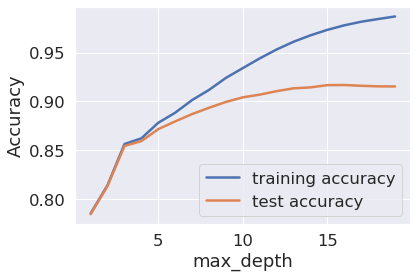

In [88]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the above plot, test accuracy becomes almost constant after a depth of 10 whereas train accuracy is increasing thus indicating 'overfitting' of the model. Thus optimal depth is selected at 10



### Tuning min_samples_leaf

In [89]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = "warn")
tree.fit(X_lasso, y_tr)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [90]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.831072,0.051335,0.002443,0.000204,5,{'min_samples_leaf': 5},0.879990,0.913156,0.915878,0.904990,0.915749,0.905953,0.013575,1,0.968017,0.965361,0.964583,0.963384,0.962509,0.964771,0.001895
1,0.692064,0.024457,0.002152,0.000123,25,{'min_samples_leaf': 25},0.874676,0.896565,0.900583,0.892417,0.901879,0.893224,0.009848,2,0.922424,0.917371,0.917404,0.914974,0.918732,0.918181,0.002443
2,0.640437,0.026127,0.002156,0.000104,45,{'min_samples_leaf': 45},0.879342,0.890603,0.894232,0.884381,0.890992,0.887910,0.005340,3,0.910337,0.906646,0.904054,0.903600,0.903989,0.905725,0.002547
3,0.602690,0.027579,0.002331,0.000231,65,{'min_samples_leaf': 65},0.880897,0.885807,0.886844,0.881270,0.887751,0.884514,0.002870,4,0.897959,0.896893,0.895013,0.896990,0.898286,0.897028,0.001143
4,0.572662,0.011231,0.002112,0.000032,85,{'min_samples_leaf': 85},0.875194,0.883733,0.882566,0.879715,0.883085,0.880859,0.003147,5,0.890992,0.893847,0.890541,0.894300,0.888403,0.891617,0.002193


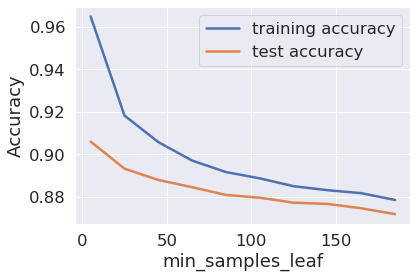

In [91]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Optimal min_samples_leaf is about 25



### Tuning min_samples_split

In [92]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = "warn")
tree.fit(X_lasso, y_tr)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [93]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.949396,0.034449,0.002635,0.000530,5,{'min_samples_split': 5},0.875065,0.916267,0.920933,0.914582,0.921841,0.909738,0.017551,1,0.994200,0.993390,0.993228,0.993681,0.993195,0.993539,0.000373
1,0.966827,0.036409,0.002522,0.000087,25,{'min_samples_split': 25},0.866770,0.909397,0.909397,0.904083,0.912378,0.900405,0.017029,2,0.961892,0.958977,0.961537,0.958329,0.960047,0.960157,0.001390
2,0.963726,0.033722,0.002524,0.000196,45,{'min_samples_split': 45},0.861846,0.906675,0.905250,0.902787,0.905638,0.896439,0.017344,3,0.948866,0.943586,0.944072,0.943715,0.943683,0.944784,0.002047
3,0.975635,0.039828,0.002791,0.000321,65,{'min_samples_split': 65},0.864308,0.903694,0.902787,0.898639,0.900972,0.894080,0.014986,4,0.938237,0.933411,0.933184,0.934837,0.931791,0.934292,0.002196
4,0.976847,0.033242,0.002430,0.000179,85,{'min_samples_split': 85},0.861846,0.901231,0.900713,0.892288,0.899806,0.891177,0.015020,5,0.931465,0.926056,0.928032,0.927903,0.923722,0.927435,0.002549


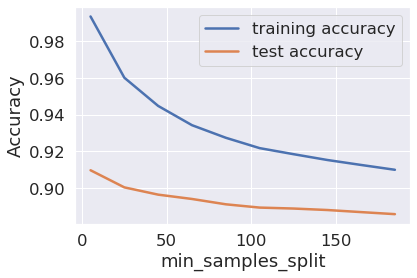

In [94]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the above plot, the optimal value of min_samples_split is about 25


In order for the optimal hyperparameters, performing a grid search on all of them at once

In [98]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 40, 5),
    'min_samples_split': range(20, 40, 5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [100]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [103]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=35)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [129]:
dec_pred = clf_gini.predict(X_test)
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,dec_pred))
print('Accuracy of Decision Tree :',accuracy_score(y_test,dec_pred))
print(classification_report(y_test, dec_pred))

[[3427  336]
 [ 288 3665]]
Accuracy of Decision Tree : 0.9191290824261276
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3763
           1       0.92      0.93      0.92      3953

    accuracy                           0.92      7716
   macro avg       0.92      0.92      0.92      7716
weighted avg       0.92      0.92      0.92      7716




Summary - Decision Tress

    Getting around 92% accuracy
    Confusion matix shows lot of false positives still exist.
    

## Random Forest

Random Forest with grid search

In [133]:
#Performing a grid search on hyperparameters similar to decision trees
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10, 20, 2),
    'min_samples_leaf': range(10, 100, 10),
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Commenting as it takes long time
# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)
# printing the optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.8min finished


Accuracy is 0.9261458760468207 using {'max_depth': 18, 'min_samples_leaf': 10}


In [176]:
#Running Random Forest with the best hyper parameters
rf_final = RandomForestClassifier(oob_score = True, min_samples_leaf = 10, max_depth = 18)
rf_final.fit(X_lasso, y_tr)
rf_pred = rf_final.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print('Accuracy of Random Forest :',accuracy_score(y_test,rf_pred))
print(classification_report(y_test, rf_pred))

[[3571  192]
 [ 129 3824]]
Accuracy of Random Forest : 0.9583981337480559
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3763
           1       0.95      0.97      0.96      3953

    accuracy                           0.96      7716
   macro avg       0.96      0.96      0.96      7716
weighted avg       0.96      0.96      0.96      7716



Based on the above metrics, the amount of false positives in churn has significantly reduced in random forest in comparison to other models and thus this would be the better amongst the three for churn prediction

In [138]:
rf_final.oob_score_

0.9340522604728329

## Feature Selection

In [175]:
features = lasso_features
importance = rf_final.feature_importances_


# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,loc_ic_mou_8,16.871034
1,loc_og_mou_8,9.921519
2,roam_og_mou_8,9.386188
3,last_day_rch_amt_8,8.689427
4,roam_ic_mou_8,8.256344
5,arpu_8,8.255388
6,total_rech_num_8,5.922566
7,offnet_mou_8,4.398439
8,std_ic_mou_8,2.897021
9,vol_2g_mb_8,2.835378


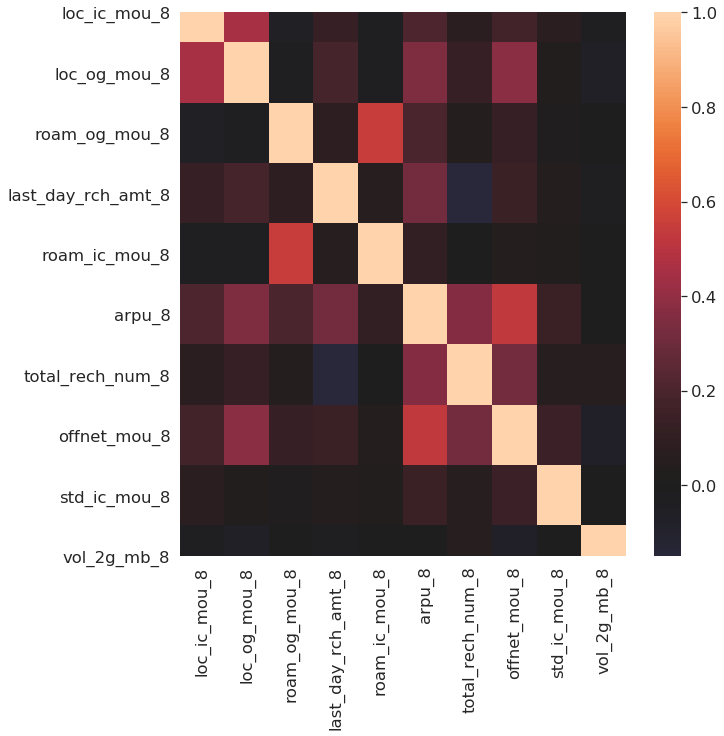

In [170]:
#Subsetting the ten best features
top_n = 10
top_features = feature_importance.variables[0:top_n]

plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=df[top_features].corr(), center=0.0)

## Recommendation - Strategies

1. The telecom should give more importance to calls on local as well as roaming, perhaps special packs for roaming customers would be helpful.
2. The number of customers doing last day recharge are more and thus some special offers for early recharge would reduce the churning
3. Customers using data also play a vital role esp. 2G and 3G and thus some special offers for them would be helpful to reduce the churn rate.

Overall, the company should give more focus onto customers who majorly deal with local calls and also special roaming packs, while also maintaing exciting offers for customers using data packs could reduce the churn rate by a considerable amount.